In [1]:
import numpy as np
import torch, torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

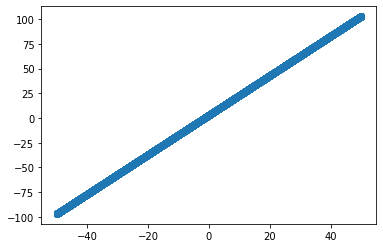

In [2]:
X = np.arange(-5000, 5000, 1) / 100
Y = 2 * X + 3

plt.plot(X, Y, 'o')
plt.show()


In [13]:
def get_train_test_dataset(X, Y):
    indices = np.random.permutation(len(X))
    X, Y = X[indices], Y[indices]
    
    X = torch.from_numpy(X).reshape((-1, 1)).double()
    Y = torch.from_numpy(Y).reshape((-1, 1)).double()
    
    train_length = int(0.8 * len(X))
    X_train, Y_train = X[:train_length], Y[:train_length]
    X_test, Y_test = X[train_length:], Y[train_length:]

    train_loader = DataLoader(TensorDataset(X_train, Y_train), batch_size=100)
    test_loader = DataLoader(TensorDataset(X_test, Y_test), batch_size=100)

    return train_loader, test_loader

train_loader, test_loader = get_train_test_dataset(X, Y)


In [14]:
class LinearModel(nn.Module):
    def __init__(self) -> None:
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)


model = LinearModel().double()
model.forward(torch.tensor([4]).double())

for name, param in model.named_parameters():
    print(name, param)

fc1.weight Parameter containing:
tensor([[0.8112]], dtype=torch.float64, requires_grad=True)
fc1.bias Parameter containing:
tensor([0.4584], dtype=torch.float64, requires_grad=True)


2984.8680300280907


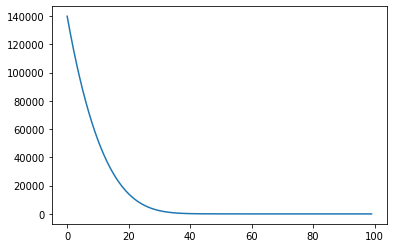

6.301374280743202e-07


In [25]:
def train(model, train_loader, optimizer, num_epochs=100):
    running_losses = []
    for epoch in range(num_epochs):
        running_loss = 0
        for i, (X_train, Y_train) in enumerate(train_loader):
            predictions = model.forward(X_train)
            loss = nn.MSELoss()(predictions, Y_train)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 50 == 0 and i > 0:
                running_losses.append(running_loss)
                running_loss = 0
    plt.plot(np.arange(len(running_losses)), running_losses)
    plt.show()

def eval(model, test_loader):
    sum_loss, count_loss = 0, 0
    for i, (X_test, Y_test) in enumerate(test_loader):
        predictions = model.forward(X_test)
        loss = nn.MSELoss()(predictions, Y_test)
        sum_loss += loss.item()
        count_loss += 1
    print(sum_loss / count_loss)

model = LinearModel().double()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
eval(model, test_loader)
train(model, train_loader, optimizer)
eval(model, test_loader)
